In [ ]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal
from urllib.request import urlretrieve

In [2]:
urlretrieve("https://upload.wikimedia.org/wikipedia/commons/6/62/%22Blow_The_Man_Down%22_sung_by_the_U.S._Naval_Academy%27s_Midshipmen_Glee_Club.mp3", "Blow the man down.mp3")

('Blow the man down.mp3', <http.client.HTTPMessage at 0x7be20f2b6e70>)

In [3]:
audio, fs = sf.read('Blow the man down.mp3')
data = np.mean(audio, axis=1)
data.shape

(5232292,)

Text(0.5, 0, 'Time (s)')

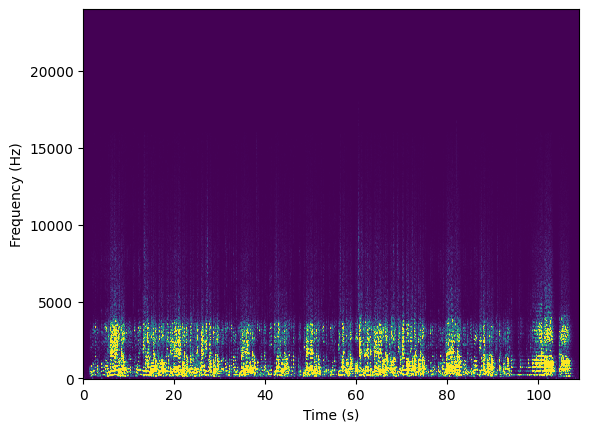

In [4]:
amp = np.max(np.abs(data))/100
f, t, Zxx = signal.stft(data, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

Text(0, 0.5, 'Amplitude')

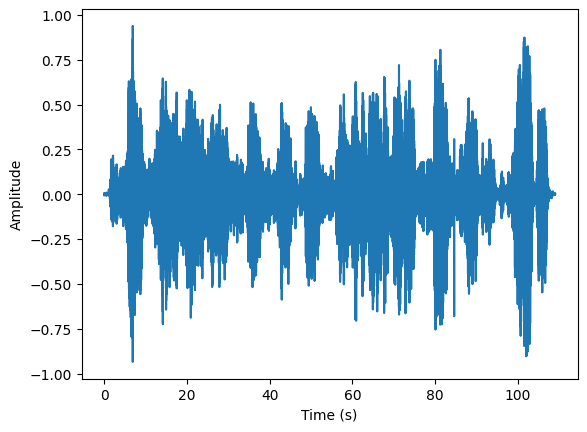

In [5]:
t = np.linspace(0, data.size/fs, num=data.size)
plt.plot(t, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

(-0.01, 0.01)

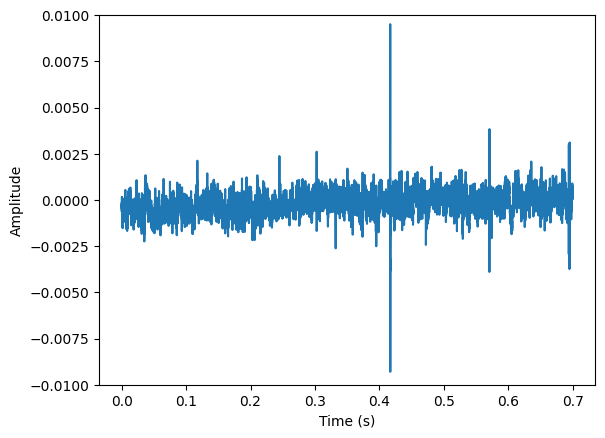

In [6]:

selectNoise = data[int(fs*0.25):int(fs*0.7)]
t = np.linspace(0, 0.7, num=selectNoise.size)
plt.plot(t, selectNoise)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-0.01,0.01)

In [7]:
_, _, noiseSpectrum = signal.stft(selectNoise, nperseg=1000)
nsMag = np.abs(noiseSpectrum)
meanNsMag = np.mean(nsMag, axis=1)

In [8]:
ZxxMag = np.abs(Zxx)
ZxxPhs = np.exp(1.0j*np.angle(Zxx))

In [9]:
subtracted = ZxxPhs*(ZxxMag-meanNsMag.reshape((meanNsMag.shape[0],1)))
t, processed = signal.istft(subtracted)


(0.0, 0.7)

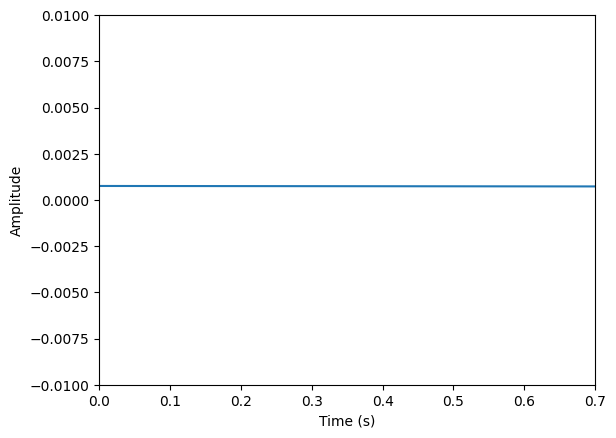

In [10]:
plt.plot(t, processed)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-0.01,0.01)
plt.xlim(0.0,0.7)

In [11]:
sf.write('Blow the man down processed.wav', processed, fs)